| Column | Description |
| ----------- | ----------- |
| price | Price of the House |
| bedrooms | No. of bedrooms in the House |
| bathrooms | No. of bathrooms in the House |
| sqft_living | Sq. Feet of the Living area in the House |
| sqft_lot | Sq. Feet of the Living area in the House |
| floors | No. of bathrooms in the Houseo |
| waterfront | If the House has water front or not |
| view | Whether the house got a good view or not |
| condition | The condition of the House |
| sqft_above | Square Feet area of the above House |
| sqft_basement | Square Feet area of the beasement in the House |
| yr_built |  The year in which the House was built |
| yr_renovated |  The year in which the House was renovated |

# Importing the Libraries

In [1]:
#Data Analysis Libraries
import numpy as np
import pandas as pd

#Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data Processing
from sklearn import preprocessing

#Data Splitting
from sklearn.model_selection import train_test_split

#ML Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
sns.set_style('darkgrid')
sns.set_palette('tab10')

# Import Data

In [3]:
train_path = pd.read_csv("data.csv")

In [4]:
train_path.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
train_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
train_path.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Missing Values

In [7]:
train_path.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
train_path.drop(['date'],axis=1,inplace=True)
train_path.drop(['street'],axis=1,inplace=True)
train_path.drop(['city'],axis=1,inplace=True)
train_path.drop(['statezip'],axis=1,inplace=True)
train_path.drop(['country'],axis=1,inplace=True)

In [9]:
(train_path.price == 0).sum()

49

In [10]:
train_path[train_path==0].count()

price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
dtype: int64

## Removing Missing Price with Mean

In [11]:
train_path[train_path["price"]==0].agg([min, max, 'mean', 'median'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
min,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000
max,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000
mean,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286
median,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000


In [12]:
unknown = train_path[(train_path.bedrooms == 4) & (train_path.bathrooms > 1) & (train_path.bathrooms < 4) & (train_path.sqft_living > 2500) & 
         (train_path.sqft_living < 3000) & (train_path.floors < 3) & (train_path.yr_built < 1970)]

In [13]:
unknown.price.mean()

735475.0370705189

In [14]:
train_path['price'].replace(to_replace = 0, value = 735000, inplace = True)

## Removing Missing Bedrooms with Mean

<Axes: xlabel='bedrooms', ylabel='sqft_living'>

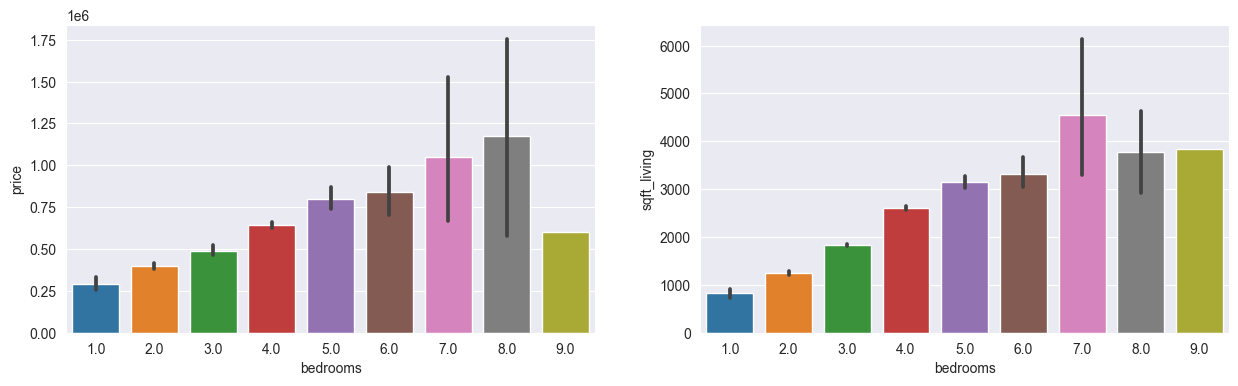

In [30]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(x='bedrooms',y='price',data=train_path)

plt.subplot(1,2,2)
sns.barplot(x='bedrooms',y='sqft_living',data=train_path)

In [16]:
train_path['bedrooms'].replace(to_replace = 0, value = 8, inplace = True)

### Removing Missing Bathrooms with Mean

<Axes: xlabel='bathrooms', ylabel='sqft_living'>

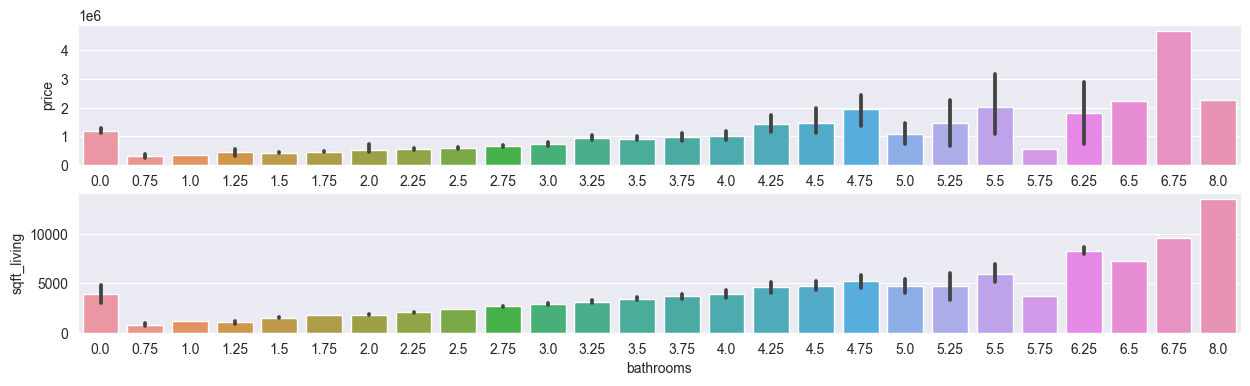

In [31]:
plt.figure(figsize=(15,4))

plt.subplot(2,1,1)
sns.barplot(x='bathrooms',y='price',data=train_path)

plt.subplot(2,1,2)
sns.barplot(x='bathrooms',y='sqft_living',data=train_path)

In [18]:
train_path['bathrooms'].replace(to_replace = 0, value = 4, inplace = True)

In [19]:
train_path[train_path==0].count()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
dtype: int64

# EDA

In [15]:
train_path.nunique(axis=0)

price            1740
bedrooms           10
bathrooms          26
sqft_living       561
sqft_lot         3087
floors              6
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
dtype: int64

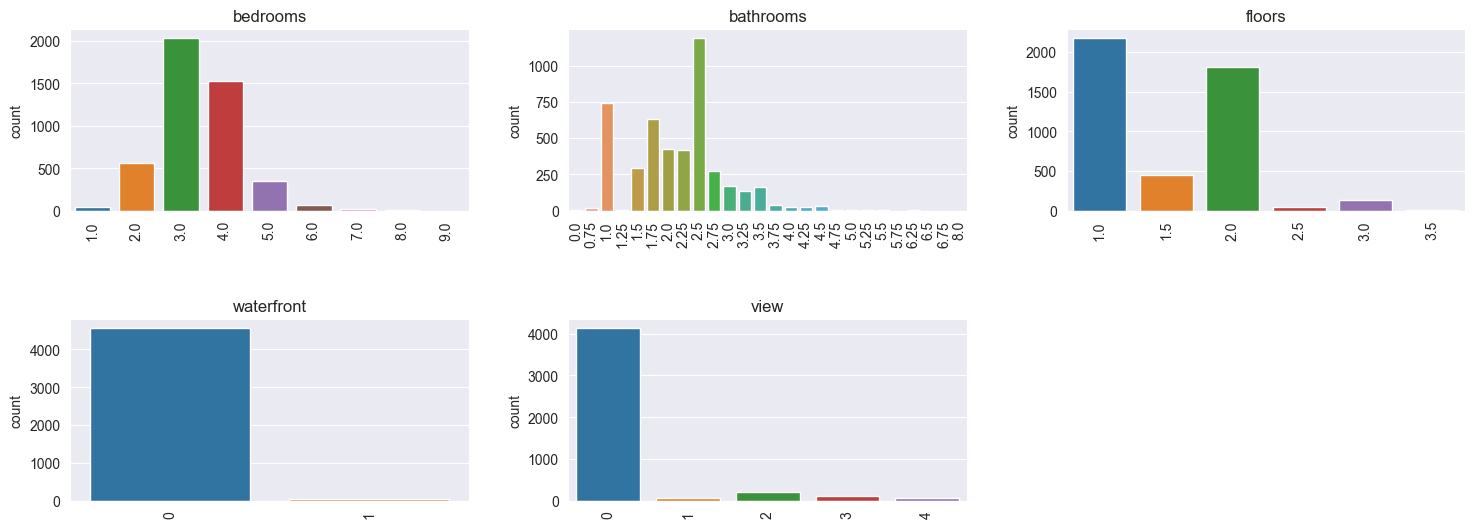

In [39]:
plt.figure(figsize=(18,40))

count = ['bedrooms','bathrooms','floors','waterfront','view']
index = 1

for col in count:
    y = train_path[col].value_counts()
    plt.subplot(11,3,index)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.6,wspace=0.25)
    sns.barplot(x=list(y.index), y=y).set_title(col)
    index +=1

## Relation of each variable with Price and Area

### 1. Bedroom

<Axes: xlabel='bedrooms', ylabel='sqft_living'>

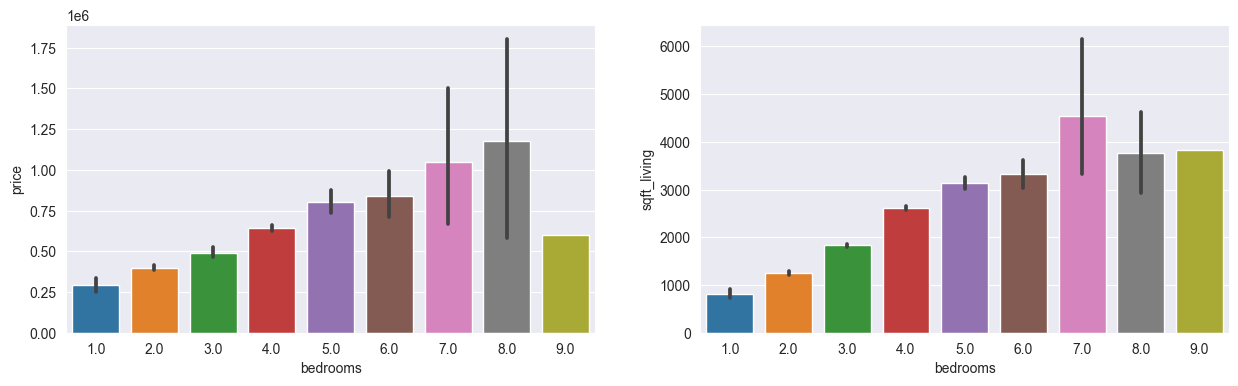

In [26]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(x='bedrooms',y='price',data=train_path)

plt.subplot(1,2,2)
sns.barplot(x='bedrooms',y='sqft_living',data=train_path)

### 2. Bathroom

<Axes: xlabel='bathrooms', ylabel='sqft_living'>

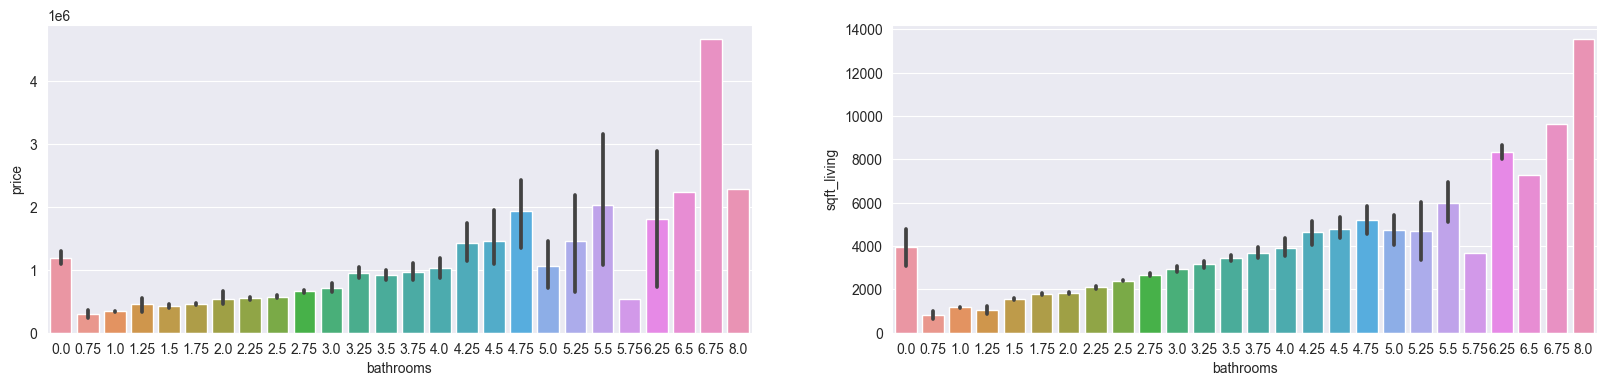

In [27]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sns.barplot(x='bathrooms',y='price',data=train_path)

plt.subplot(1,2,2)
sns.barplot(x='bathrooms',y='sqft_living',data=train_path)

### 3. floors

<Axes: xlabel='floors', ylabel='sqft_living'>

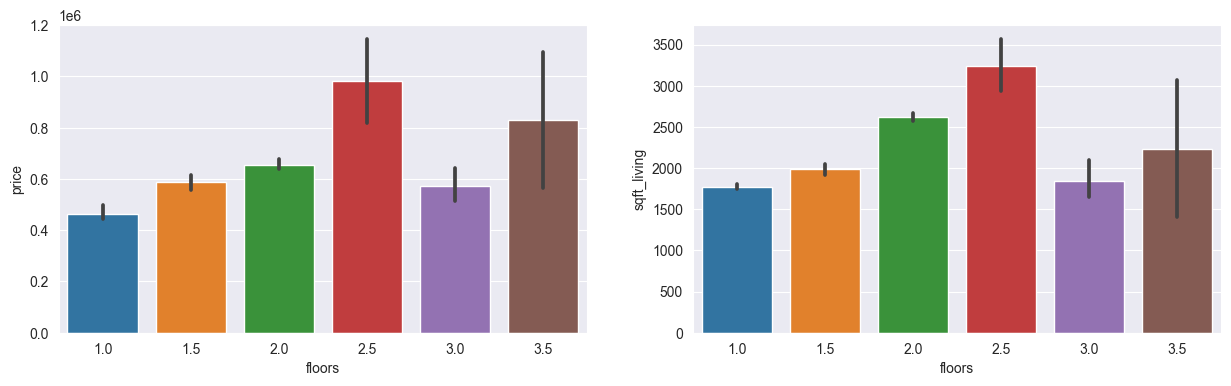

In [28]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(x='floors',y='price',data=train_path)

plt.subplot(1,2,2)
sns.barplot(x='floors',y='sqft_living',data=train_path)

## Correlation

<Axes: >

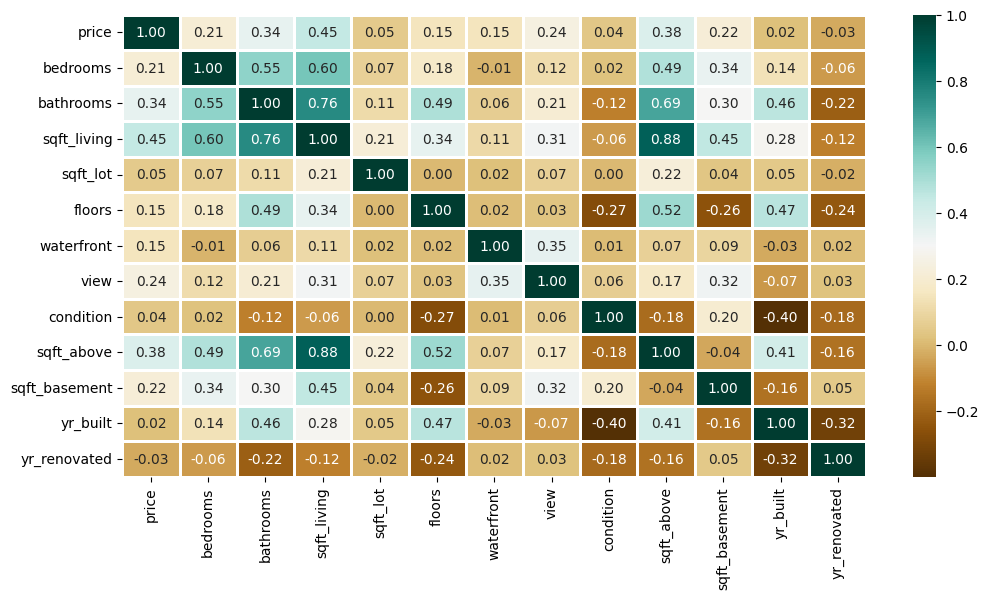

In [18]:
plt.figure(figsize=(12,6))
  
sns.heatmap(train_path.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)